In [84]:
import pandas as pd
import numpy as np
#visulization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
# data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv("Bone Tumor Dataset.csv")
df

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_022,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_034,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_022,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_015,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_037,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
...,...,...,...,...,...,...,...,...,...
495,STS_011,Male,31,Intermediate,epithelioid sarcoma,MFH,left thigh,D,Surgery + Chemotherapy
496,STS_021,Male,41,High,poorly differentiated synovial sarcoma,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
497,STS_034,Female,60,Intermediate,pleomorphic sarcoma,Synovial sarcoma,right thigh,NED,Radiotherapy + Surgery
498,STS_037,Male,43,High,synovial sarcoma,MFH,right thigh,D,Radiotherapy + Surgery + Chemotherapy


In [86]:
df

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_022,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_034,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_022,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_015,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_037,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
...,...,...,...,...,...,...,...,...,...
495,STS_011,Male,31,Intermediate,epithelioid sarcoma,MFH,left thigh,D,Surgery + Chemotherapy
496,STS_021,Male,41,High,poorly differentiated synovial sarcoma,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
497,STS_034,Female,60,Intermediate,pleomorphic sarcoma,Synovial sarcoma,right thigh,NED,Radiotherapy + Surgery
498,STS_037,Male,43,High,synovial sarcoma,MFH,right thigh,D,Radiotherapy + Surgery + Chemotherapy


In [87]:
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_022,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_034,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_022,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_015,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_037,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [88]:
df.tail()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
495,STS_011,Male,31,Intermediate,epithelioid sarcoma,MFH,left thigh,D,Surgery + Chemotherapy
496,STS_021,Male,41,High,poorly differentiated synovial sarcoma,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
497,STS_034,Female,60,Intermediate,pleomorphic sarcoma,Synovial sarcoma,right thigh,NED,Radiotherapy + Surgery
498,STS_037,Male,43,High,synovial sarcoma,MFH,right thigh,D,Radiotherapy + Surgery + Chemotherapy
499,STS_034,Female,73,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,left biceps,NED,Radiotherapy + Surgery


In [89]:
df.columns

Index(['Patient ID', 'Sex', 'Age', 'Grade', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment'],
      dtype='object')

In [90]:
df.describe()

,Age
count,500.000000
mean,55.396000
std,16.131573
min,17.000000
25%,44.000000
50%,56.000000
75%,68.000000
max,83.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [92]:
df.shape

(500, 9)

In [93]:
df.dtypes

Patient ID              object
Sex                     object
Age                      int64
Grade                   object
Histological type       object
MSKCC type              object
Site of primary STS     object
Status (NED, AWD, D)    object
Treatment               object
dtype: object

In [94]:
df.isna().sum()

Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64

In [95]:
df.nunique()

Patient ID              18
Sex                      2
Age                     65
Grade                    2
Histological type       13
MSKCC type               3
Site of primary STS      7
Status (NED, AWD, D)     3
Treatment                3
dtype: int64

In [96]:
df['Status (NED, AWD, D)'].value_counts()

NED    247
D      141
AWD    112
Name: Status (NED, AWD, D), dtype: int64

In [97]:
print(df['MSKCC type'].unique())

['Leiomyosarcoma' 'MFH' 'Synovial sarcoma']


In [98]:
df['Patient ID'].unique()

array(['STS_022', 'STS_034', 'STS_015', 'STS_037', 'STS_023', 'STS_041',
       'STS_011', 'STS_012', 'STS_003', 'STS_039', 'STS_048', 'STS_002',
       'STS_020', 'STS_005', 'STS_031', 'STS_021', 'STS_024', 'STS_029'],
      dtype=object)

In [99]:
df['Age'].max()

83

In [100]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [101]:
df['Grade'].unique()

array(['High', 'Intermediate'], dtype=object)

In [102]:
df['Histological type'].unique()


array(['pleiomorphic leiomyosarcoma', 'synovial sarcoma',
       'pleiomorphic spindle cell undifferentiated',
       'poorly differentiated synovial sarcoma', 'myxoid fibrosarcoma',
       'sclerosing epithelioid fibrosarcoma', 'leiomyosarcoma',
       'malignant solitary fibrous tumor',
       'undifferentiated pleomorphic liposarcoma', 'myxofibrosarcoma',
       'epithelioid sarcoma', 'undifferentiated - pleiomorphic',
       'pleomorphic sarcoma'], dtype=object)

In [103]:
df['Site of primary STS'].unique()

array(['parascapusular', 'left thigh', 'right buttock', 'right thigh',
       'right parascapusular', 'left biceps', 'left buttock'],
      dtype=object)

In [104]:
df['Treatment'].unique()

array(['Radiotherapy + Surgery', 'Surgery + Chemotherapy',
       'Radiotherapy + Surgery + Chemotherapy'], dtype=object)

In [105]:
df[df['Patient ID'] == 'STS_015']

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
3,STS_015,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
37,STS_015,Female,66,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
43,STS_015,Female,53,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
68,STS_015,Female,57,Intermediate,myxofibrosarcoma,Leiomyosarcoma,left buttock,NED,Radiotherapy + Surgery
82,STS_015,Female,61,Intermediate,leiomyosarcoma,Leiomyosarcoma,right buttock,NED,Radiotherapy + Surgery
85,STS_015,Female,71,Intermediate,pleiomorphic leiomyosarcoma,Synovial sarcoma,left thigh,D,Surgery + Chemotherapy
95,STS_015,Male,68,High,pleiomorphic spindle cell undifferentiated,Leiomyosarcoma,left thigh,D,Radiotherapy + Surgery
121,STS_015,Female,58,Intermediate,pleiomorphic leiomyosarcoma,MFH,left biceps,NED,Radiotherapy + Surgery
125,STS_015,Female,80,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
129,STS_015,Male,69,High,myxofibrosarcoma,Synovial sarcoma,right parascapusular,AWD,Surgery + Chemotherapy


In [106]:
df_pl = df[df['Histological type'] == 'pleiomorphic leiomyosarcoma']

unique_values_counts = df_pl['Grade'].value_counts()
print("Pleiomorphic leiomyosarcoma")
for value, count in unique_values_counts.items():
    print(f"{value}: {count} times")

Pleiomorphic leiomyosarcoma
Intermediate: 60 times
High: 44 times


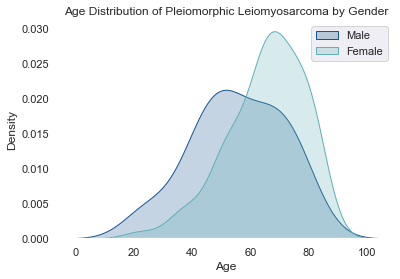

In [107]:
df_pl = df[df['Histological type'] == 'pleiomorphic leiomyosarcoma']

sns.set_style('whitegrid')
sns.set(font="sans-serif")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_pl[df_pl['Sex'] == 'Male']['Age'], label='Male', color='#16558F', fill=True)
sns.kdeplot(data=df_pl[df_pl['Sex'] == 'Female']['Age'], label='Female', color='#61B0B7', fill=True)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution of Pleiomorphic Leiomyosarcoma by Gender', fontsize=12)

plt.legend()

ax = plt.gca()
ax.set_facecolor('white')
ax.set_frame_on(True)

plt.show()

In [108]:
#MSKCC Types by Gender
import plotly.graph_objs as go
import plotly.offline as pyo


male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

male_mskcc_counts = male_data['MSKCC type'].value_counts()
female_mskcc_counts = female_data['MSKCC type'].value_counts()

categories = male_mskcc_counts.index

blue_palette = ['#16558F', '#0583D2', '#61B0B7']

data1 = {
    "values": male_mskcc_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 0},
    "name": "Male MSKCC Type",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data2 = {
    "values": female_mskcc_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 1},
    "name": "Female MSKCC Type",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data = [data1, data2]

layout = go.Layout(
    {
        "title": {
            "text": "MSKCC Types by Gender (Male vs. Female)",
            "font": {
                "size": 20
            },
            "x": 0.5  # Center the title
        },
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Male",
                "x": 0.21,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Female",
                "x": 0.805,
                "y": 0.5
            }
        ]
    }
)

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

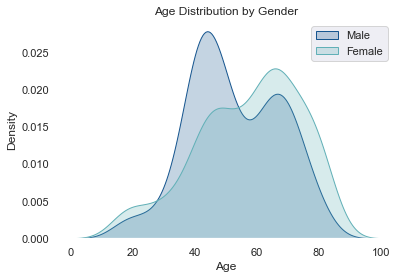

In [109]:
#Age Distribution
import matplotlib.pyplot as plt

male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

sns.set_style('whitegrid') 
sns.set(font="sans-serif")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=male_data['Age'], label='Male', color='#16558F', fill=True)

sns.kdeplot(data=female_data['Age'], label='Female', color='#61B0B7', fill=True)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution by Gender', fontsize=12)

plt.legend()

ax = plt.gca()
ax.set_facecolor('white')
ax.set_frame_on(True)

plt.show()

In [110]:
#Site of Primary STS by Gender
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

total_male_count = len(male_data)
total_female_count = len(female_data)

male_site_counts = male_data['Site of primary STS'].value_counts()
female_site_counts = female_data['Site of primary STS'].value_counts()

male_site_per = (male_site_counts / total_male_count) * 100
fem_site_per = (female_site_counts / total_female_count) * 100

print("Male Site of primary STS (Percentages):")
print(male_site_per)
print("\nFemale Site of primary STS (Percentages):")
print(fem_site_per)

Male Site of primary STS (Percentages):
left thigh              47.0
right buttock           17.0
right thigh             12.5
right parascapusular    11.0
left buttock             7.5
parascapusular           3.0
left biceps              2.0
Name: Site of primary STS, dtype: float64

Female Site of primary STS (Percentages):
right thigh             36.666667
left thigh              19.333333
right buttock           12.666667
parascapusular          11.000000
left biceps             10.666667
left buttock             7.000000
right parascapusular     2.666667
Name: Site of primary STS, dtype: float64


In [111]:

male_site_counts = male_data['Site of primary STS'].value_counts()
female_site_counts = female_data['Site of primary STS'].value_counts()

categories = male_site_counts.index

blue_palette = ['#16558F', '#0583D2', '#61B0B7', '#3090A7', '#B68CB8', '#6461A0', '#EFBDEB']

data1 = {
    "values": male_site_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 0},
    "name": "Male Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data2 = {
    "values": female_site_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 1},
    "name": "Female Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data = [data1, data2]

layout = go.Layout(
    {
        "title": {
            "text": "Site of Primary STS by Gender",
            "font": {
                "size": 20
            },
            "x": 0.5  # Center the title
        },
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Male",
                "x": 0.21,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Female",
                "x": 0.805,
                "y": 0.5
            }
        ]
    }
)

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

In [112]:

cols = ['Patient ID', 'Sex', 'Grade', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment']
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [195]:
df.describe()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.066000,0.400000,55.396000,0.564000,6.198000,0.974000,3.410000,1.270000,0.542000
std,5.120751,0.490389,16.131573,0.496384,3.488141,0.741906,1.973243,0.803986,0.710807
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,44.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000
50%,10.000000,0.000000,56.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000
75%,14.000000,1.000000,68.000000,1.000000,10.000000,2.000000,6.000000,2.000000,1.000000
max,17.000000,1.000000,83.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000


In [114]:
df.corr()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
Patient ID,1.000000,0.246435,-0.109438,-0.171566,0.119876,0.105951,0.003266,-0.186386,0.178448
Sex,0.246435,1.000000,-0.143687,-0.533478,0.155115,0.094741,-0.134615,-0.574367,0.388646
Age,-0.109438,-0.143687,1.000000,0.056643,-0.181037,-0.257674,-0.106849,0.121997,-0.235473
Grade,-0.171566,-0.533478,0.056643,1.000000,-0.090088,0.007248,0.174686,0.401017,-0.271743
Histological type,0.119876,0.155115,-0.181037,-0.090088,1.000000,0.169260,0.026323,-0.155588,0.240331
MSKCC type,0.105951,0.094741,-0.257674,0.007248,0.169260,1.000000,0.144186,-0.189790,0.300385
Site of primary STS,0.003266,-0.134615,-0.106849,0.174686,0.026323,0.144186,1.000000,0.100614,-0.073025
"Status (NED, AWD, D)",-0.186386,-0.574367,0.121997,0.401017,-0.155588,-0.189790,0.100614,1.000000,-0.463482
Treatment,0.178448,0.388646,-0.235473,-0.271743,0.240331,0.300385,-0.073025,-0.463482,1.000000


<AxesSubplot:>

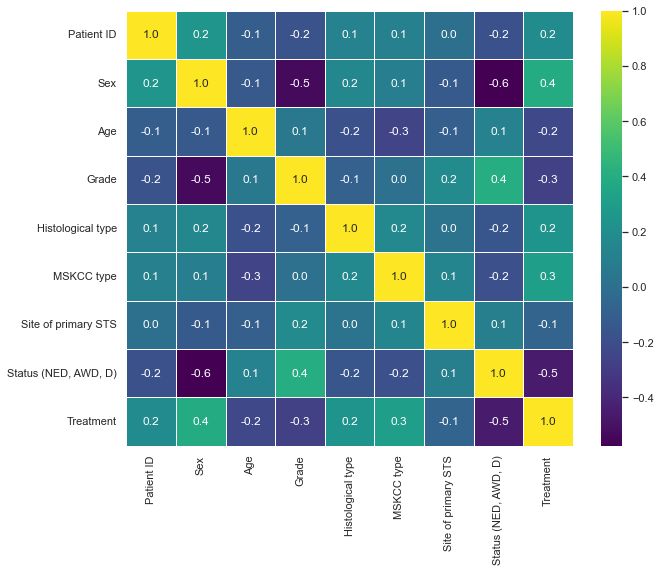

In [115]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df.shape

(500, 9)

In [118]:
df.duplicated().sum()

0

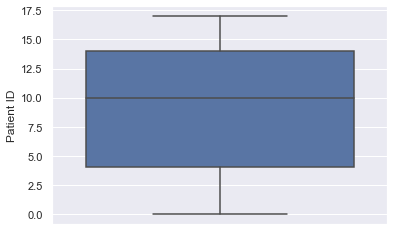

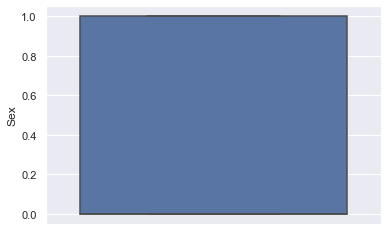

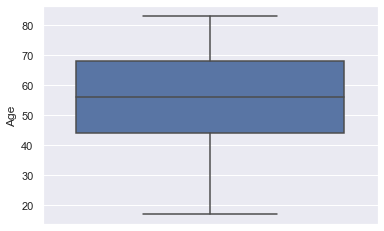

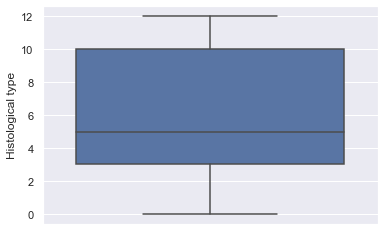

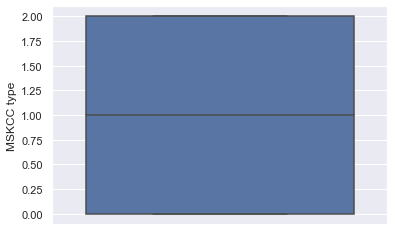

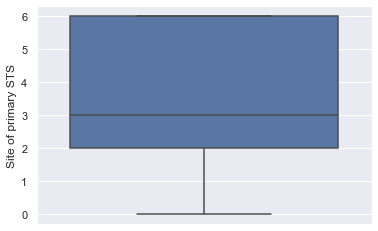

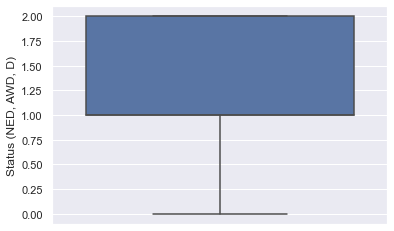

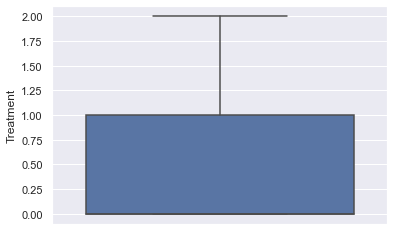

In [119]:
col=['Patient ID',"Sex",'Age', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)',"Treatment"]
for c in col:
    
  plt.figure()
  sns.boxplot(y=c,data=df)

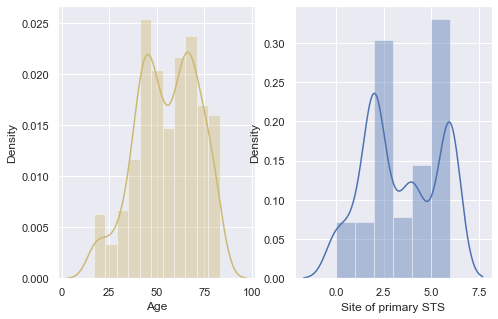

In [120]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(df["Age"],color="y")
plt.subplot(132)
sns.distplot(df["Site of primary STS"])
plt.show()

<AxesSubplot:xlabel='Status (NED, AWD, D)', ylabel='count'>

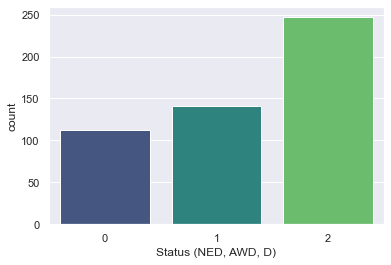

In [121]:
sns.countplot(x = df['Status (NED, AWD, D)'], palette = 'viridis')

In [122]:
X = df.drop(['Status (NED, AWD, D)'], axis = 1)
y = df['Status (NED, AWD, D)']

In [169]:
sc= StandardScaler()
x = sc.fit_transform(X)
import pickle
pickle.dump(sc,open("sscaler.pkl","wb"))


In [170]:
x

array([[-0.20838109, -0.81649658,  0.47184584, ..., -1.31414918,
        -0.20798789, -0.76327733],
       [ 0.76901613, -0.81649658, -0.08662504, ...,  0.03507996,
        -0.71527542,  2.05324418],
       [-0.20838109,  1.22474487, -2.07229925, ...,  0.03507996,
         0.29929964, -0.76327733],
       ...,
       [ 0.76901613, -0.81649658,  0.28568888, ...,  1.3843091 ,
         1.31387471, -0.76327733],
       [ 0.96449557,  1.22474487, -0.76920055, ...,  0.03507996,
         1.31387471,  0.64498342],
       [ 0.76901613, -0.81649658,  1.09236903, ..., -1.31414918,
        -1.72985049, -0.76327733]])

In [171]:
x = pd.DataFrame(X)

In [172]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

x_bal, y_bal = smote.fit_resample(x, y)

In [173]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.3, random_state=42)

In [174]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(518, 8)
(223, 8)
(518,)
(223,)


In [175]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [176]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [177]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [178]:
y_pred

array([2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1,
       0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2,
       1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 0, 0])

In [179]:
y_train_pred

array([0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1,
       2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2,

In [180]:
Testreport = classification_report(y_test, y_pred)
Trainreport = classification_report(y_train, y_train_pred)

In [181]:
print(Trainreport)
print(Testreport)


              precision    recall  f1-score   support

           0       0.74      0.81      0.77       169
           1       0.79      0.58      0.67       181
           2       0.69      0.82      0.74       168

    accuracy                           0.73       518
   macro avg       0.74      0.74      0.73       518
weighted avg       0.74      0.73      0.73       518

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        78
           1       0.51      0.44      0.47        66
           2       0.66      0.72      0.69        79

    accuracy                           0.65       223
   macro avg       0.63      0.63      0.63       223
weighted avg       0.64      0.65      0.64       223



In [136]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 32, 16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200, 300],
}

In [168]:
# Random Search
random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(X_train, y_train)
best_model1 = random_search.best_estimator_
test_acc = best_model1.score(X_test, y_test)
train_acc = best_model1.score(X_train, y_train) 
print(f'Train Accuracy: {train_acc*100:.2f}%')
test_acc = best_model1.score(X_test, y_test) 
print(f'Test Accuracy: {test_acc*100:.2f}%')

Train Accuracy: 78.96%
Test Accuracy: 63.23%


In [137]:
# Grid Search
grid_search = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(64, 32), (128, 64),
                                                (32, 32, 16)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [138]:
best_model = grid_search.best_estimator_  

In [139]:
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 62.78%


In [140]:
train_accuracy = best_model.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Train Accuracy: 71.62%


In [141]:
df.head(5)

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,8,0,63,0,5,0,3,2,0
1,13,0,54,1,5,1,2,1,2
2,8,1,22,1,10,1,4,1,0
3,5,0,54,1,10,0,6,2,0
4,14,1,63,0,6,1,5,0,1


In [196]:
## Tesing

best_model1.predict([[8,0,63,0,5,0,3,0]])

array([2])

In [197]:
best_model1.predict([[13,0,54,1,5,1,2,2]])

array([1])

In [198]:
best_model1.predict([[14,1,63,0,6,1,5,1]])

array([0])

In [189]:
Patient_ID=8
Sex=0
Age=63
Grade=0
Histological_type=5
MSKCC_type=0
Site_of_primary_STS=3
Treatment=0

In [193]:
names = [[Patient_ID,Sex,Age,Grade,Histological_type,MSKCC_type,Site_of_primary_STS,Treatment]]
model.predict(sc.transform(names))


array([2])

In [199]:
import pickle
pickle.dump(best_model1,open("model.pkl","wb"))